In [1]:
from KGS import *

In [ ]:

def read_data(Etrans ,detector):
    
    if Etrans != 0:
        filename = '../SD_Cluster_v11/'+'v11_Ei_'+str(Etrans)+'_open'+'/tof_det_'+detector+'_mid_res.dat'
        filename2 = '../SD_Cluster_v11/'+'v11_open_t_offset_'+str(Etrans)+'/moderator_off_set.dat'  
        t_bins = np.genfromtxt(filename)

    
    if Etrans in (0, 1) and detector.lower() in ('2p7', '3p2'):
        filename = '../SD_Cluster_v11/'+'v11_Ei_'+str(Etrans)+'02_open'+'/tof_det_'+detector+'_mid_res.dat'
        filename2 = '../SD_Cluster_v11/'+'v11_Ei_'+str(Etrans)+'02_open'+'/moderator_off_set.dat'  
        t_bins = np.genfromtxt(filename)
        

    if Etrans in (0, 1) and detector.lower() in ('3p8', '4p4', '5p0'):
        filename = '../SD_Cluster_v11/'+'v11_Ei_'+str(Etrans)+'05_open'+'/tof_det_'+detector+'_mid_res.dat'
        filename2 = '../SD_Cluster_v11/'+'v11_Ei_'+str(Etrans)+'05_open'+'/moderator_off_set.dat' 
        t_bins = np.genfromtxt(filename)
         


    with open(filename2, 'r') as the_file:
        all_data2 = [line.strip() for line in the_file.readlines()]
        height_line2 = all_data2[3]
        data2 = all_data2[8:]
        t_data2 = all_data2[37]
        t_data2 = t_data2.replace('# statistics: X0=', '')
        t_data2 = t_data2.replace('dX=', '')
        t_data2 = t_data2.replace(';', '')
        t_data2 = t_data2.split(' ')
        t_data2 = np.asarray(t_data2[0], dtype=float)
        print(t_data2)
        t_offset = np.array([t_data2])
    
    
    with open(filename, 'r') as the_file:
        all_data = [line.strip() for line in the_file.readlines()]
        height_line = all_data[3]
        data = all_data[8:]
        t_data = all_data[37]
        t_data = t_data.replace('# statistics: X0=', '')
        t_data = t_data.replace('dX=', '')
        t_data = t_data.replace(';', '')
        t_data = t_data.split(' ')
        t_data = np.asarray(t_data, dtype=float)
        
        
        PSC_t = all_data[13]
        PSC_t = PSC_t.replace('# Param: chopPulseOpening=','')
        PSC_t = np.asarray(PSC_t, dtype=float)
        
        detector = detector.replace('p', '.')
        detector = np.asarray(detector, dtype=float)
        
        meta_data = np.array([detector, Etrans, PSC_t])
        
        meta_data = np.concatenate((meta_data, t_data, t_offset))
        
        return meta_data, t_bins
       
# Resulting data format: Detector, DeltaE, PSC opening time, time peak center, time peak width, t_offset 
    
read_data(1, '3p8')#[1]

2045.7


(array([3.80000e+00, 1.00000e+00, 4.00000e-03, 1.73961e+05, 8.74374e+02,
        2.04570e+03]),
 array([[5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [1.50000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [2.50000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        ...,
        [2.49975e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [2.49985e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [2.49995e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00]]))

In [3]:
def import_phase_section():
    meta_data = []
    time_data = []

    Delta_E = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])
    detectors = np.array(['2p7', '3p2', '3p8', '4p4', '5p0'])

    #for i in range(N_points):
    for j in detectors:
        for n in Delta_E:
            print(n,j)
            r_data = read_data(n, j)
            meta_data.append(r_data[0])
            time_data.append(r_data[1])
                
    fin_meta_data = np.asarray(meta_data)
    fin_time_data = time_data
    return fin_meta_data, fin_time_data

phase = import_phase_section()

phase_space = phase[0]
time_phase_space = phase[1]

0 2p7
2142.74
1 2p7
2095.12
2 2p7
1993.27
3 2p7
1978.56
4 2p7
1959.34
5 2p7
1943.24
6 2p7
1932.76
7 2p7
1924.88
8 2p7
1916.14
9 2p7
1907.01
10 2p7
1897.32
15 2p7
1884.41
20 2p7
1873.0
25 2p7
1858.36
30 2p7
1850.63
35 2p7
1840.5
40 2p7
1831.33
45 2p7
1819.66
50 2p7
1808.28
0 3p2
2142.74
1 3p2
2095.12
2 3p2
1993.27
3 3p2
1978.56
4 3p2
1959.34
5 3p2
1943.24
6 3p2
1932.76
7 3p2
1924.88
8 3p2
1916.14
9 3p2
1907.01
10 3p2
1897.32
15 3p2
1884.41
20 3p2
1873.0
25 3p2
1858.36
30 3p2
1850.63
35 3p2
1840.5
40 3p2
1831.33
45 3p2
1819.66
50 3p2
1808.28
0 3p8
2058.06
1 3p8
2045.7
2 3p8
1993.27
3 3p8
1978.56
4 3p8
1959.34
5 3p8
1943.24
6 3p8
1932.76
7 3p8
1924.88
8 3p8
1916.14
9 3p8
1907.01
10 3p8
1897.32
15 3p8
1884.41
20 3p8
1873.0
25 3p8
1858.36
30 3p8
1850.63
35 3p8
1840.5
40 3p8
1831.33
45 3p8
1819.66
50 3p8
1808.28
0 4p4
2058.06
1 4p4
2045.7
2 4p4
1993.27
3 4p4
1978.56
4 4p4
1959.34
5 4p4
1943.24
6 4p4
1932.76
7 4p4
1924.88
8 4p4
1916.14
9 4p4
1907.01
10 4p4
1897.32
15 4p4
1884.41
20 4p4
1873.0

In [4]:
back_info = pd.read_csv('BIFROST_McStas_backend_information.csv')
back_info = back_info.loc[back_info['wedge_number'] == 1]

back_info = np.asarray(back_info)[:,0:5]

for j in range(len(back_info)):
    back_info[j,3] = back_info[j,3].replace(',','.')
    back_info[j,4] = back_info[j,3].replace(',','.')

back_info = np.asarray(back_info, dtype=float)    
    
back_info = back_info[(back_info[:,0]== 2.7)  & (back_info[:,2]== 4) | (back_info[:,0]== 3.2) & (back_info[:,2]== 4)| (back_info[:,0]== 3.8) & (back_info[:,2]== 5) | (back_info[:,0]== 4.4) & (back_info[:,2]== 5) | (back_info[:,0]== 5.0) & (back_info[:,2]== 5)]

phase_space_meta = []

for i in range(len(phase_space)):
    if phase_space[i,0]==2.7:
        test1 = np.concatenate((phase_space[i],back_info[0,3:5]))
        phase_space_meta.append(test1)
    if phase_space[i,0]==3.2:
        test2 =np.concatenate((phase_space[i],back_info[1,3:5]))
        phase_space_meta.append(test2)
    if phase_space[i,0]==3.8:
        test3 =np.concatenate((phase_space[i],back_info[2,3:5]))
        phase_space_meta.append(test3)
    if phase_space[i,0]==4.4:
        test4 =np.concatenate((phase_space[i],back_info[3,3:5]))
        phase_space_meta.append(test4)
    if phase_space[i,0]==5.0:
        test5 =np.concatenate((phase_space[i],back_info[4,3:5]))
        phase_space_meta.append(test5)
        
phase_space = np.asarray(phase_space_meta)      


/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_43794/3262759701.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


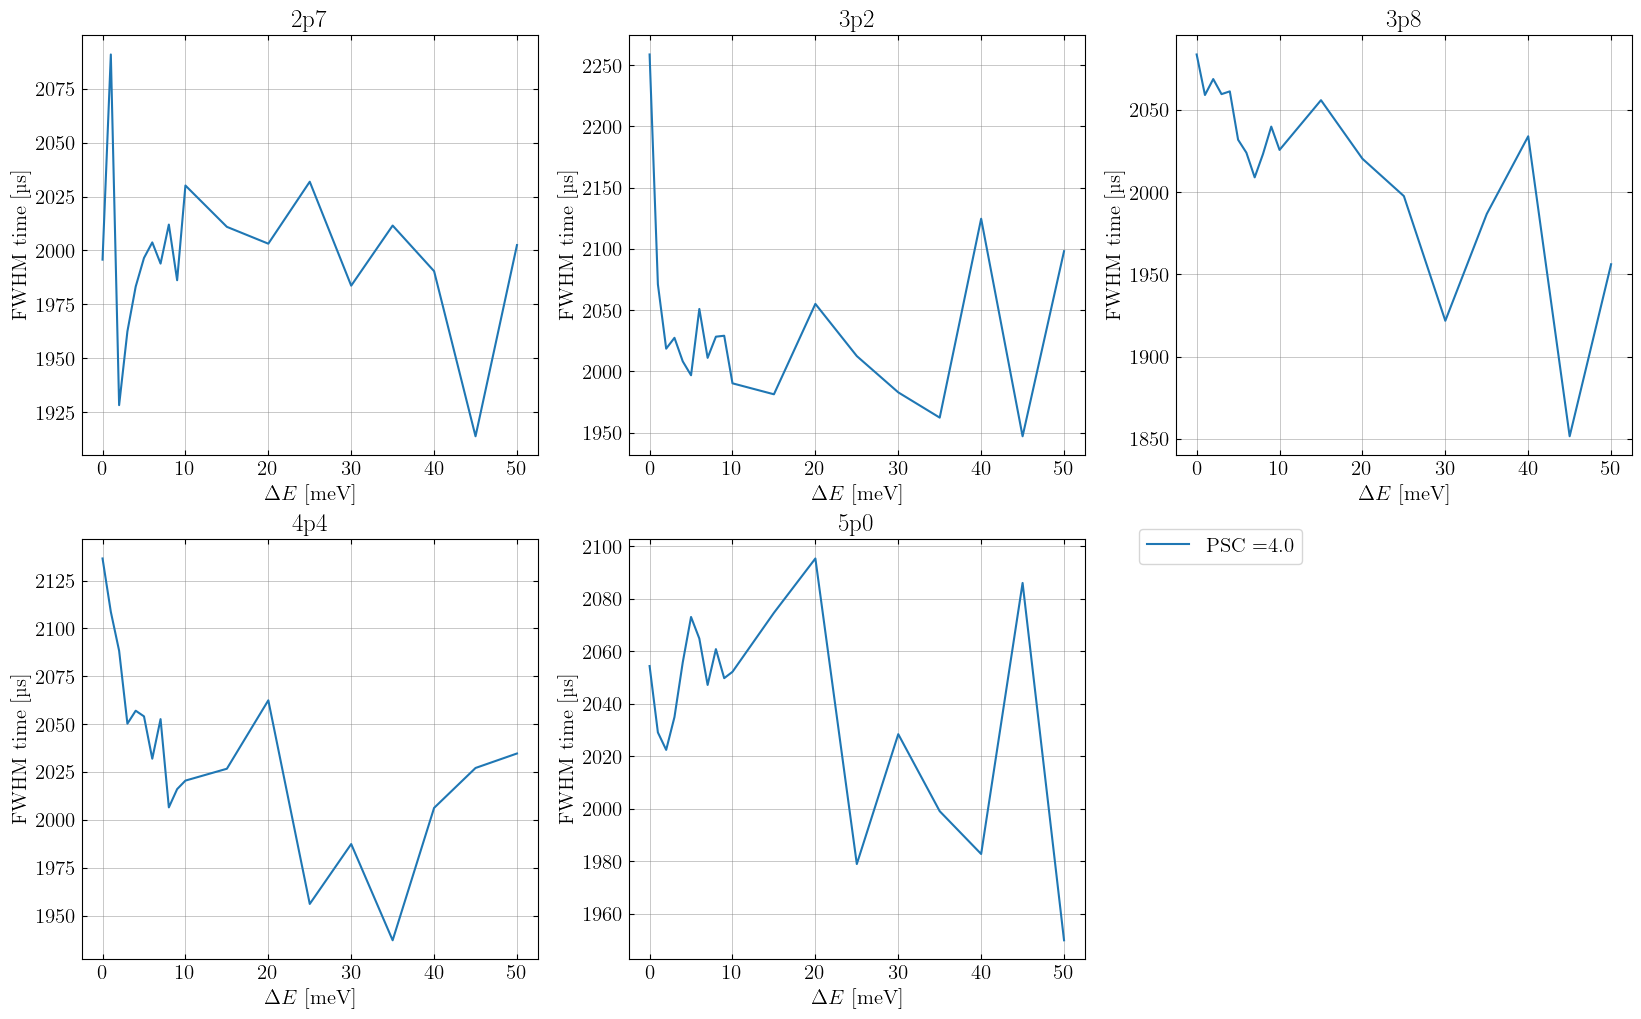

In [5]:
detectors = np.array(['2p7', '3p2', '3p8', '4p4', '5p0'])

detector_float = np.array([2.7, 3.2, 3.8, 4.4, 5.0])

DeltaE = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])

Time_FWHM= []

PSC_times = np.array([0.004])

n = 5
max_width = 3 ##images per row
height, width = n//max_width +1, max_width
fig, axs = plt.subplots(height, width, figsize=(20,12))

for i in range(len(detector_float)):
    sub_space = phase_space[phase_space[:,0]==detector_float[i]]
    for n in range(len(PSC_times)):
        sub_space_2= sub_space[sub_space[:,2]==PSC_times[n]]
        ax = axs.flat[i]
        Time_FWHM.append(sub_space_2[:,4])#*2.355
        ax.plot(sub_space_2[:,1], sub_space_2[:,4]*2.355, '-', label='PSC ='+str(PSC_times[n]*1000))
        ax.set_xlabel('$\Delta E$ [meV]')
        ax.set_ylabel('FWHM time [µs]')
        ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
        ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
    ax.set_title(detectors[i])
ax.legend( bbox_to_anchor=(1.0, 0.55, 0.5, 0.5))


## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj
    
fig.show()

Time_FWHM = np.reshape(Time_FWHM, (5,-1,19))

In [6]:
def t_to_DeltaE(meta_data, time_data):
    
    detector = meta_data[0]*1.602176634e-22 # [J]
    t_offset = meta_data[5]*1e-6
    
    time = time_data[time_data[:,0]>=40*1e3]
    
    t = time[:,0]*1e-6 # [s]
    m_n = 1.67492749804e-27 # [kg]
    L1 = (162+4) # [m]
    L2 = meta_data[6]+meta_data[7] # [m]
    
    Ei = (L1**2*m_n)/(2*(t-np.sqrt((m_n*L2**2)/(2*detector))-t_offset)**2)
    Delta_E = (Ei-detector)*6.24150907e21 # convert from J to meV
    
    mu = np.average(Delta_E, weights=time[:,1])
    FWHM = np.sqrt(np.average((Delta_E-mu)**2, weights=time[:,1]))*2.3548
    
    #print('µ = ', mu)
    #print('var = ', FWHM)
    
    return np.column_stack((Delta_E, time[:,1::])), mu, FWHM


test_set_index = 1

test, test_mu, test_FWHM = t_to_DeltaE(phase_space[test_set_index], time_phase_space[test_set_index]) 

print(test,test_mu, test_FWHM)

[[115.90283679   0.           0.           0.        ]
 [115.83479906   0.           0.           0.        ]
 [115.76681986   0.           0.           0.        ]
 ...
 [ -0.29684315   0.           0.           0.        ]
 [ -0.29703946   0.           0.           0.        ]
 [ -0.29723574   0.           0.           0.        ]] 1.194289016602173 0.08469376459551155


In [7]:

print(type(time_phase_space))

time_phase_space = np.array(time_phase_space)

mu_E =[]
FWHM_E = []

for i in range(len(detector_float)):
    time_sub_space = time_phase_space[phase_space[:,0]==detector_float[i]]
    sub_space = phase_space[phase_space[:,0]==detector_float[i]]
    for n in range(len(PSC_times)):
        time_sub_space_2 = time_sub_space[sub_space[:,2]==PSC_times[n]]
        sub_space_2 = sub_space[sub_space[:,2]==PSC_times[n]]
        for j in range(len(sub_space_2)):
            E_sub_space, E_mu, E_FWHM = t_to_DeltaE(sub_space_2[j], time_sub_space_2[j])
            mu_E.append(E_mu)
            FWHM_E.append(E_FWHM)
   
mu_E = np.asarray(mu_E)
FWHM_E = np.asarray(FWHM_E)
FWHM_E = np.reshape(FWHM_E, (5,19))


print(np.array2string(FWHM_E, separator=', '))

#print(FWHM_E)



<class 'list'>
[[0.05047229, 0.08469376, 0.11187455, 0.15200751, 0.19572513, 0.24267521,
  0.29256789, 0.34270092, 0.40039887, 0.45184591, 0.52239177, 0.85094357,
  1.2316407 , 1.68187558, 2.11020194, 2.64529505, 3.16803103, 3.5626935 ,
  4.3720732 ],
 [0.07369018, 0.10142161, 0.13620131, 0.17806856, 0.22077108, 0.26677391,
  0.32558146, 0.37286876, 0.43249258, 0.4917027 , 0.54257482, 0.8750314 ,
  1.30646281, 1.71756427, 2.15943602, 2.63541525, 3.43157199, 3.70805615,
  4.62428957],
 [0.08791794, 0.12332932, 0.16444742, 0.2078546 , 0.25552361, 0.30181161,
  0.35327043, 0.40566753, 0.46644831, 0.53149398, 0.59038301, 0.95308522,
  1.33503707, 1.75715997, 2.14363567, 2.73050499, 3.35619816, 3.5781519 ,
  4.38539661],
 [0.11217631, 0.15068248, 0.19233766, 0.23484702, 0.28490031, 0.33688016,
  0.38767771, 0.44947118, 0.49856097, 0.56269299, 0.62817008, 0.98519071,
  1.41597205, 1.774108  , 2.28280546, 2.72877526, 3.37576562, 3.99942725,
  4.65340055],
 [0.13098704, 0.1696116 , 0.2129287 ,

In [8]:
print(np.shape(FWHM_E))
print(np.shape(phase_space))
  # 2D list with shape (1425, 8)

# Zipping the lists together
zipped_list = [(*a, b) for a, b in zip(phase_space, FWHM_E)]

#np.savetxt('list_output_line_resolution.txt', zipped_list, fmt='%.5f', delimiter=' ', header='#Detector, DeltaE, PSC opening time, time peak center, time peak width, t_offset, FWHM_E', comments='')

# Appending to a text file
with open('list_output_line_resolution_open.txt', 'a') as file:
    for row in zipped_list:
        # Convert each tuple to a space-separated string and write it
        file.write(" ".join(map(str, row)) + "\n")

(5, 19)
(95, 8)
